Sales Summary:
     product  total_quantity  revenue
0   Keyboard               5    175.0
1     Laptop               2   1400.0
2    Moniter               3    450.0
3      Mouse              10    200.0
4  Use cable              15     75.0


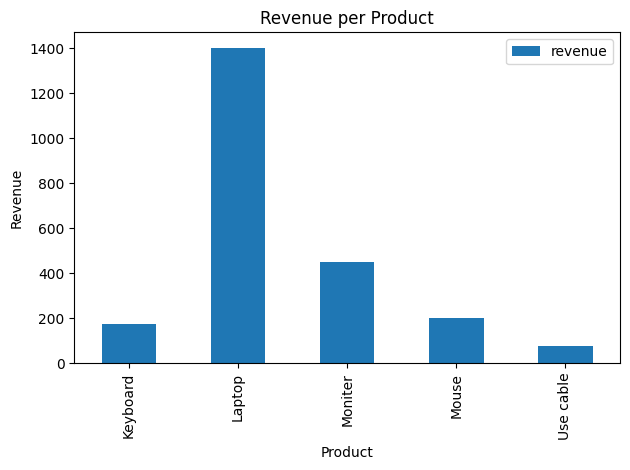

In [15]:
# Import required libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("mydatabase.db")

# Run SQL query to get total quantity and revenue per product
query = """
SELECT product,
       SUM(quantity) AS total_quantity,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load the query results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the results
print("Sales Summary:")
print(df)

# Plot a bar chart of revenue per product
df.plot(kind='bar', x='product', y='revenue', title='Revenue per Product')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.tight_layout()

# Save the chart
plt.savefig("sales_chart.png")

# Close the database connection
conn.close()

In [14]:
# Create the sales table and insert sample data
conn = sqlite3.connect("mydatabase.db")

conn.execute("DROP TABLE IF EXISTS sales") # Add this line to drop the table if it exists

conn.execute('''
CREATE TABLE sales
             (product TEXT, quantity INTEGER, price REAL)
''')

conn.execute("INSERT INTO sales VALUES ('Laptop', 2, 700.00)")
conn.execute("INSERT INTO sales VALUES ('Mouse', 10, 20.00)")
conn.execute("INSERT INTO sales VALUES ('Moniter', 3, 150.00)")
conn.execute("INSERT INTO sales VALUES ('Keyboard',5, 35.00)")
conn.execute("INSERT INTO sales VALUES ('Use cable', 15, 5.00)")

conn.commit()
conn.close()

In [16]:
from google.colab import files
files.download('sales_chart.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>